Kullback-Leibler divergence for the multivariate normal distribution


In mathematical statistics, the Kullback–Leibler divergence (also called relative entropy and I-divergence), is a type of statistical distance: 
a measure of how one probability distribution P is different from a second, reference probability distribution Q.

Let x be a random vector.

Assume two multivariate normal distributions P and Q specifying the probability distribution of x as:


\begin{split}
P: \; x &\sim \mathcal{N}(\mu_1, \Sigma_1) \\
Q: \; x &\sim \mathcal{N}(\mu_2, \Sigma_2) \; .
\end{split}

Then, the Kullback-Leibler divergence of P and Q is given by:



\begin{split}

\mathrm{KL}[P\,||\,Q] = \frac{1}{2} \left[ (\mu_2 - \mu_1)^T \Sigma_2^{-1} (\mu_2 - \mu_1) + \mathrm{tr}(\Sigma_2^{-1} \Sigma_1) - \ln \frac{|\Sigma_1|}{|\Sigma_2|} - n \right] \; .
\end{split}

Maximizing likelihood is equivalent to minimizing KL-Divergence

As a simple example:

In [6]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns

In [8]:
z, y = make_regression(n_samples=100, n_features=2, n_targets=1, n_informative=3,
                       noise=0.5, bias=-2.5, random_state=42)


dataset = pd.DataFrame()
dataset['var1'] = z[:, 0]
dataset['var2'] = z[:, 1]
dataset['var3'] = y[:]


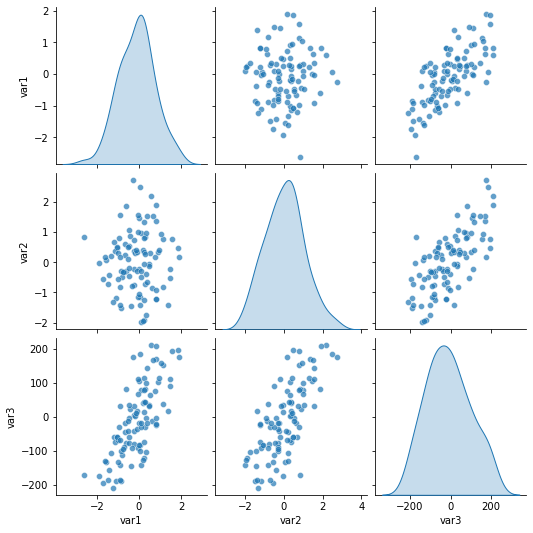

In [9]:

sns.pairplot(dataset, kind="scatter",markers=["o", "s", "D"], diag_kind="kde",
             palette="muted", plot_kws={'alpha':0.7})
plt.show()

In [10]:
#Selecting the interval
interval = np.linspace(10,50,3)

#dimention of the dataset
d = 3

X = np.array([dataset.iloc[:,0].values, dataset.iloc[:,1].values,dataset.iloc[:,2].values])

In [12]:

#############################
#eq. above.
#############################

def  MDI_Cal(matIn, matOut):
    
    n,d =X.shape
    S_I  = np.cov(matIn)
    mu_In   = np.array([[np.mean(matIn[0,:]),np.mean(matIn[1,:]),np.mean(matIn[2,:])]])
    
    S_Out = np.cov(matOut)
    mu_Out  = np.array([[np.mean(matOut[0,:]),np.mean(matOut[1,:]),np.mean(matOut[2,:])]])
    
    mu = mu_Out - mu_In
    
    KL = -(1/2)* (  np.dot( np.dot(mu,np.linalg.inv(S_Out)) , mu.transpose()) + 
                np.trace(np.linalg.inv(S_Out)*S_I) + math.log( np.abs(np.linalg.det(S_Out)) / np.abs(np.linalg.det(S_I)) ) - d )
    
    return KL 


#############################
#in Univariate case we can xhange covariance to variance
#############################

In [13]:
# 4.2. calculating KL divergence for different intervals
    
KL_ALL = []
    
for i in interval:
     
     s_point = 0
     e_point = s_point + int(i)
     KL      = []     
     
     while (e_point <= np.size(X,1)):
            
            matIn  = X[:,s_point:e_point+1]
            matOut = np.concatenate((X[:,0:s_point],X[:,e_point+1:np.size(X,1)+1]), axis=1)
            
            KL.append( MDI_Cal(matIn, matOut) )
    
            s_point += 1
            e_point += 1

     KL_ALL.append(KL)



calculation for interval: 10.0


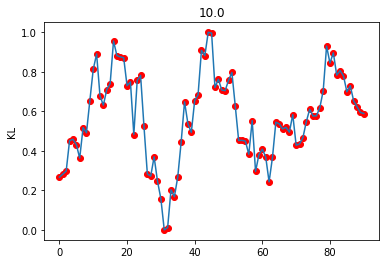

calculation for interval: 30.0


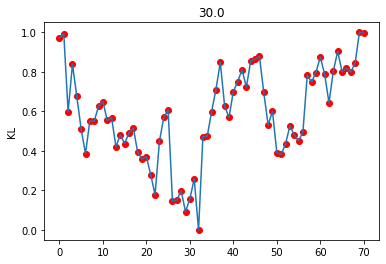

calculation for interval: 50.0


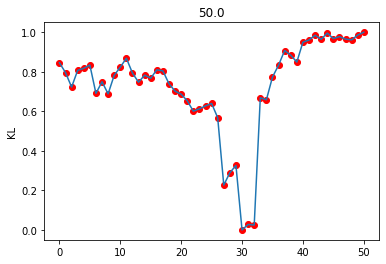

In [14]:
# 4.3. Detection of anomaly with respect to the calculated KL for different intervals

pos = []
thresh = 1.7

anomaly_detector = np.zeros((1,np.size(X,1)))

for k in np.arange(len(interval)):
    
    print('calculation for interval: '+str(interval[k])) 
    
    KL = ( i[0][0] for i in KL_ALL[k] )  
    KL = list(KL)        
    KL = [  ( num - np.min(KL) ) / ( np.max(KL) - np.min(KL) ) for num in KL ]
       
    dummy = []
    
    for i in np.arange(len(KL)):    
       if KL[i] <= thresh:        
          dummy.append(i)
    
    KL = np.reshape(KL,(1,len(KL)))
    
    plt.plot(KL[0,:])
    plt.scatter(dummy,KL[0,dummy],c='r')
    plt.ylabel('KL')
    plt.title(str(interval[k]))
    plt.show()
        
    for num in dummy:
        
        anomaly_detector[0,num:num+int(interval[k])] = anomaly_detector[0,num:num+int(interval[k])] + 1


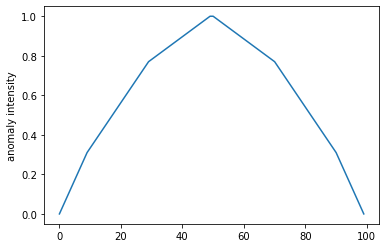

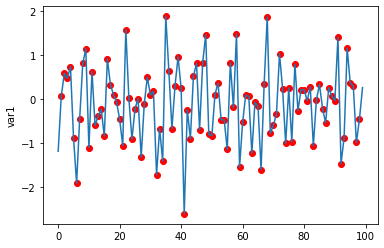

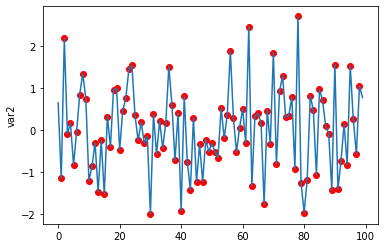

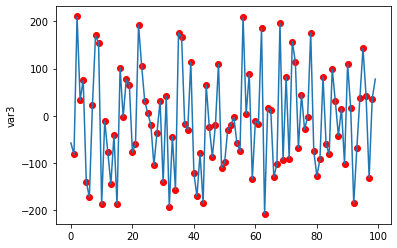

In [15]:
#########################
# 5. Visualising the data 
#########################

anomaly_detector = [ ( num - np.min(anomaly_detector[0,:]) ) / ( np.max(anomaly_detector[0,:]) - np.min(anomaly_detector[0,:]) ) for num in anomaly_detector[0,:] ]
        
anomaly_detector = np.reshape(anomaly_detector,(1,len(anomaly_detector)))

plt.plot(anomaly_detector[0,:])   
plt.ylabel('anomaly intensity')  
plt.show()    

myList = []

for  i in np.arange(np.size(anomaly_detector,1)):
    
    if anomaly_detector[0,i] > 0:
        
        myList.append(i)


plt.plot(X[0,:])
plt.scatter(myList,X[0,myList],c='r')
plt.ylabel( dataset.columns[0])
plt.show()

plt.plot(X[1,:])
plt.scatter(myList,X[1,myList],c='r')
plt.ylabel( dataset.columns[1])
plt.show()

plt.plot(X[2,:])
plt.scatter(myList,X[2,myList],c='r')
plt.ylabel( dataset.columns[2])
plt.show()
